### Differential Equation

$\frac{\mathrm{d}\Psi}{\mathrm{d}x} = \alpha\Psi,$

$\Psi(0) = 2, \alpha = 3, x \in [0, 2]$

In [11]:
from typing import List, Callable
import autograd.numpy as np

from core.neural_network import init_weights, forward
from core.optimizers import gradient_descent, adam
from core.activation_functions import elu, sigmoid, tanh, arctan
from core.plotting_tools import plot_ode, plot_system_ode

In [12]:
PSI_0 = np.array([2])


def derivative(x, psi) -> np.ndarray:
    """Exponential function derivative.

    Args:
        x: The input vector
        psi: The function vector

    Returns:
        Value of psi's partial derivatives at x.
    """
    psi_dot = psi * 3
    return psi_dot


def analytical_solution(x):
    """Analytical solution to example #1.
    Args:
        x: The input vector

    Returns:
        Value of psi at x.
    """
    return 2 * np.exp(3 * x)


def trial_solution(
    t: np.array, weights_list: List[List[np.array]], activation_fns: List[Callable]
) -> np.ndarray:
    """Calculates the trial solution of the system of DEs.

    Args:
        t: The input vector
        weights_list: A list of weights and biases for each neural networks

    Returns:
        A NumPy array of the trial solution of the system of DEs
        dimension (len(weights_list), len(t))
    """
    f = [
        forward(t, weights_list[i], activation_fns).reshape(t.size)
        for i in range(len(weights_list))
    ]
    return np.array([PSI_0[i] + t * f[i] for i in range(len(weights_list))])

### Training

Iteration:  0
 5.6377981214516435
Iteration:  1
 5.625364415181128
Iteration:  2
 5.613719570600771
Iteration:  3
 5.602870890398862
Iteration:  4
 5.592827761707076
Iteration:  5
 5.583593616830905
Iteration:  6
 5.575164162424036
Iteration:  7
 5.567525662895331
Iteration:  8
 5.560653202605957
Iteration:  9
 5.554509179844309
Iteration:  10
 5.5490425106594925
Iteration:  11
 5.544189129376487
Iteration:  12
 5.539874136376417
Iteration:  13
 5.536015346715867
Iteration:  14
 5.532527486424726
Iteration:  15
 5.529326290510071
Iteration:  16
 5.526332088189602
Iteration:  17
 5.523472701354143
Iteration:  18
 5.520685553155507
Iteration:  19
 5.517918922444769
Iteration:  20
 5.515132357109486
Iteration:  21
 5.512296350998492
Iteration:  22
 5.50939145468719
Iteration:  23
 5.506407013187286
Iteration:  24
 5.503339709851023
Iteration:  25
 5.500192060757347
Iteration:  26
 5.49697096272192
Iteration:  27
 5.493686360544326
Iteration:  28
 5.490350069630215
Iteration:  29
 5.486974

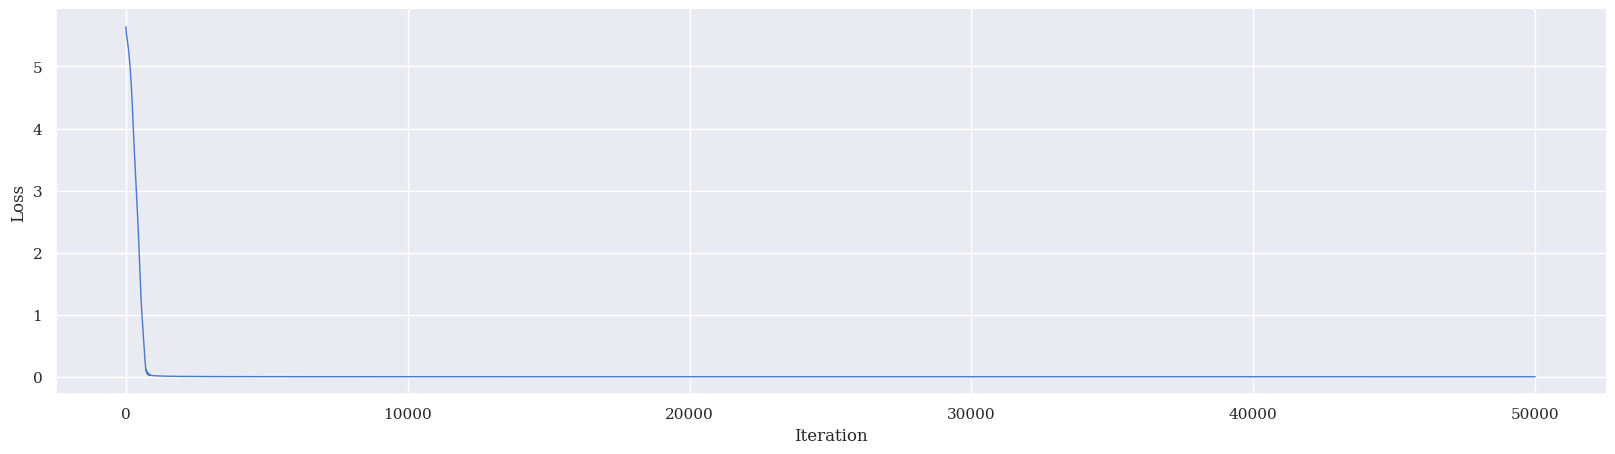

In [13]:
def train():
    t = np.arange(0, 1, 0.1)
    hidden_sizes = np.array([10])
    activation_fns = [sigmoid] * (len(hidden_sizes)) + [lambda x: x]
    nn_weights = init_weights(1, hidden_sizes, 1)
    adam(
        t,
        [nn_weights],
        activation_fns,
        trial_solution,
        derivative,
        num_iters=50000,
        step_size=0.01,
        threshold=0.000001,
    )

    return nn_weights, activation_fns


nn_weights, activation_fns = train()

### Evaluating Results

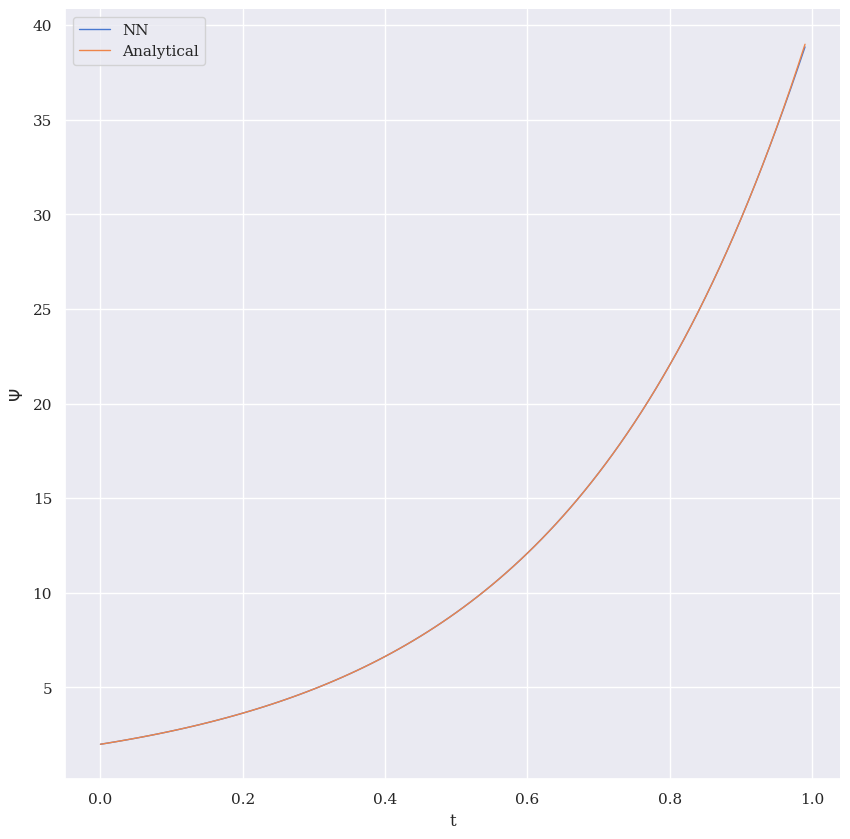

In [14]:
t = np.arange(0, 1, 0.01)
res = trial_solution(t, [nn_weights], activation_fns)
an_sol = analytical_solution(t)
plot_ode(t, res, an_sol)